In [2]:
!pip install scanpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.0/103.0 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 10.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 51.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 7.0 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82816 sha256=0d8947d7a9f96d74e0130e8198e36f60198c338c89dc78f350eabbf04a4347cd
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8026 sha256=b6b8cf916dfa76637

In [11]:
!pip install squidpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
import numpy as np
import pandas as pd
import scanpy as sc
import squidpy as sq
from scipy.cluster import hierarchy as sch
from matplotlib import pyplot as plt
from copy import deepcopy
%matplotlib inline

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
from pathlib import Path
vizgen_dir = Path().resolve() / "drive" / "MyDrive" / "stage_M2_CRCT"

adata = sq.read.vizgen(
               vizgen_dir,
               counts_file='HumanOvarianCancerPatient2Slice2_cell_by_gene.csv',
               meta_file='HumanOvarianCancerPatient2Slice2_cell_metadata.csv'
)
adata

AnnData object with n_obs × n_vars = 71381 × 500
    obs: 'fov', 'volume', 'min_x', 'max_x', 'min_y', 'max_y'
    uns: 'spatial'
    obsm: 'blank_genes', 'spatial'

In [14]:
adata.var_names_make_unique()
adata.var["mt"] = adata.var_names.str.startswith("mt-")
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"],percent_top=(50, 100, 200, 300), inplace=True)

In [15]:
sc.pp.filter_cells(adata, min_counts=50)
sc.pp.filter_genes(adata, min_cells=10)

In [16]:
print('normalize total')
sc.pp.normalize_total(adata)
print('log transform')
sc.pp.log1p(adata)
print('scale')
sc.pp.scale(adata, max_value=10)

normalize total
log transform
scale


In [18]:
!pip install numba

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
# Dimensionality Reduction, Neighbor Calculation, and Clustering
resolution = 1.5
print('PCA')
sc.tl.pca(adata, svd_solver='arpack')
print('neighbors')
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=20)

PCA
neighbors


In [20]:
!pip install llvmlite

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
print('UMAP')
sc.tl.umap(adata)
print('Leiden')
sc.tl.leiden(adata, resolution=resolution)

UMAP
Leiden


/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


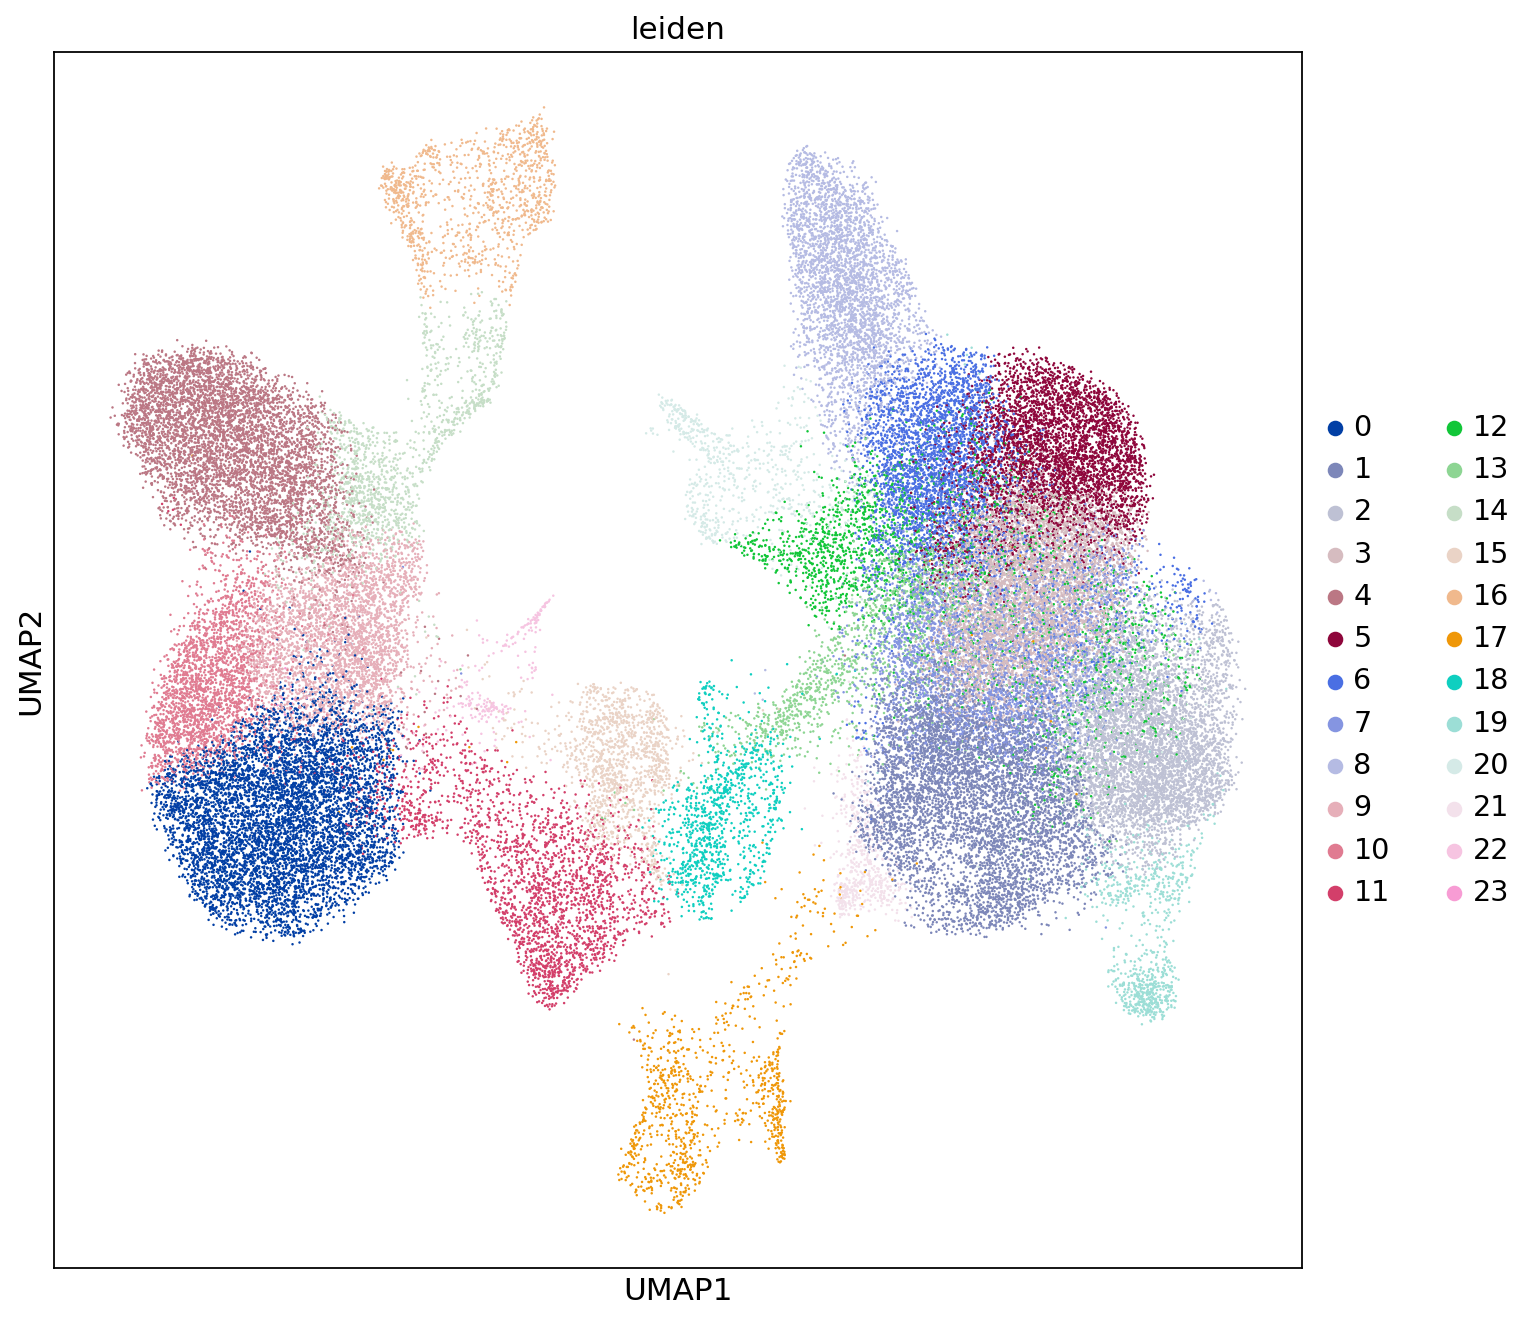

In [22]:
# UMAP with Leiden Clustering Labels
sc.set_figure_params(figsize=(10,10))
sc.pl.umap(adata, color=['leiden'], size=5)

/usr/local/lib/python3.10/dist-packages/squidpy/pl/_spatial_utils.py:956: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


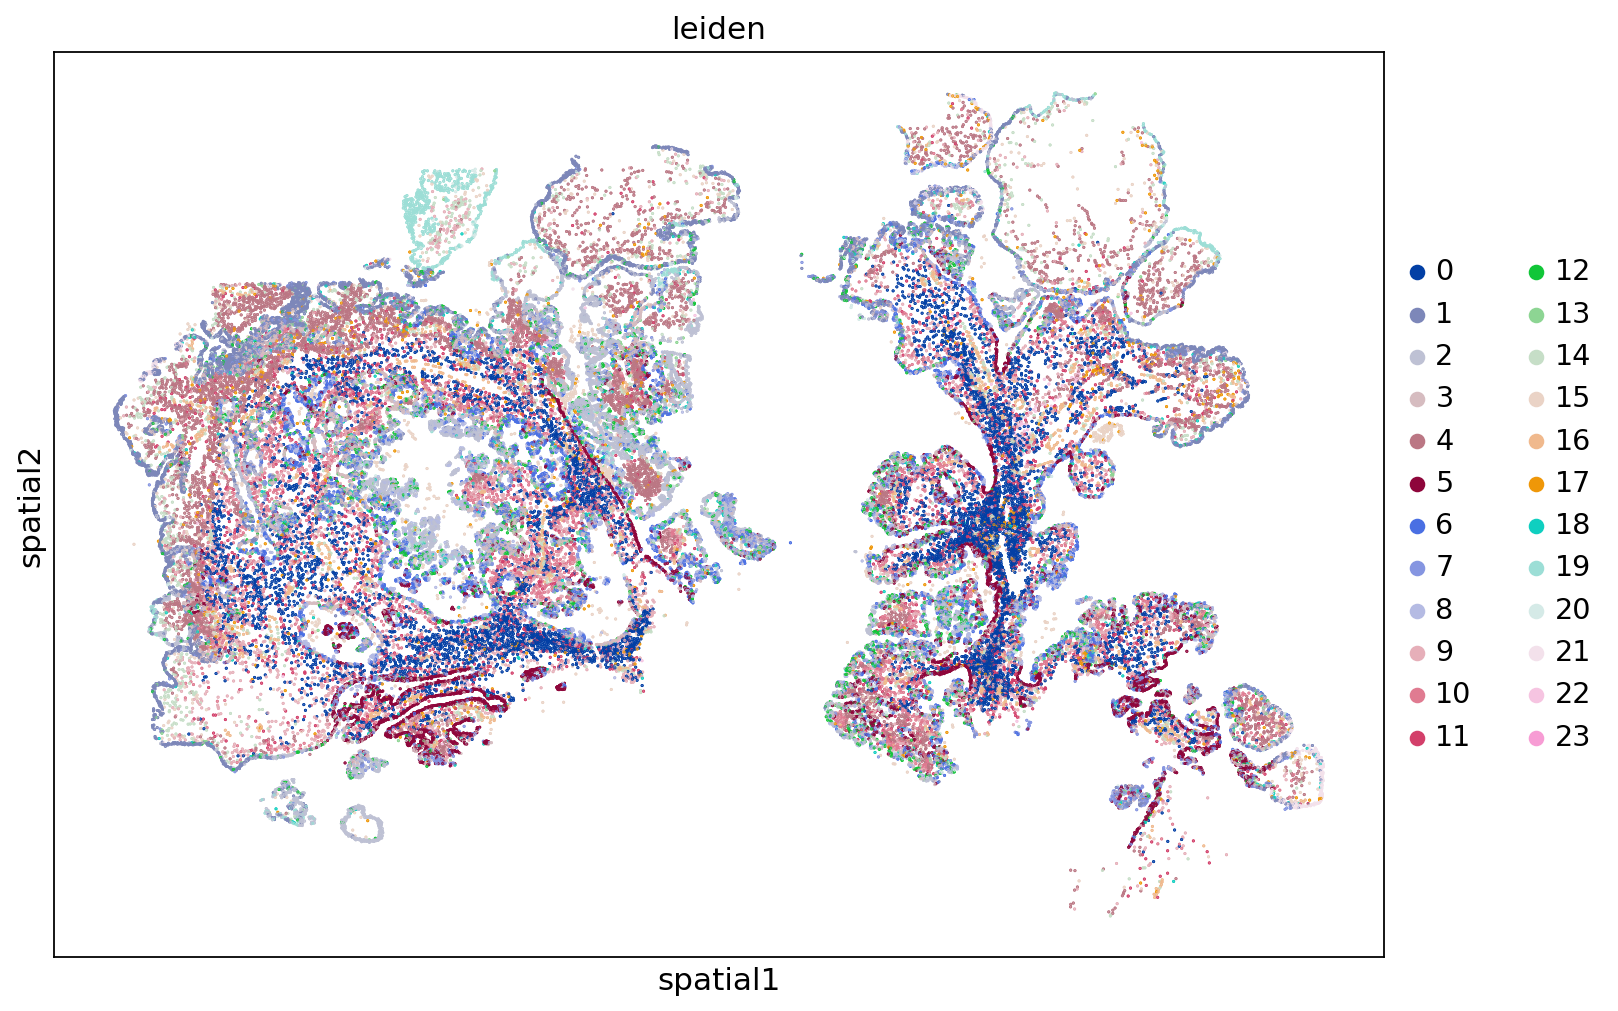

In [23]:
# Spatial Distributions of Cells
sq.pl.spatial_scatter(
    adata,
    shape=None,
    color="leiden",
    size=0.5,
    library_id='spatial',
    figsize=(10, 10)
)